# OUTLIERS DETECTION MODELS

In [23]:
import pandas as pd
import seaborn as sns
from pyod.models.knn import KNN
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
import sklearn.neighbors
from sklearn.neighbors import kneighbors_graph
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest
from scipy import stats

In [2]:
df = pd.read_csv('data/suelos_preprocesado.csv')
df.head()

id  departamento      municipio            cultivo  \
0 NaN  cundinamarca          funza             uchuva   
1 NaN  cundinamarca        bituima           citricos   
2 NaN  cundinamarca    villapinzón  pastos-brachiaria   
3 NaN  cundinamarca    villapinzón  pastos-brachiaria   
4 NaN  cundinamarca  bogotá,  d.c.        papa de año   

                   fertilizantes    ph  materia_organica    fosforo  \
0                      no indica  5.66          9.706679   5.622299   
1                      no indica  8.08          3.417595   7.570468   
2                      no indica  5.87          2.336659  16.901172   
3                      no indica  5.56          6.853757  32.076383   
4  15-15-15, 18-18-18 y 10-30-10  4.87         16.041251  64.199200   

      azufre    acidez  ...  drenaje_regular  riego_aspersión  riego_cañón  \
0   4.345550       NaN  ...                0                0            0   
1   6.832461       NaN  ...                0                0            0   
2  14.424084       NaN  ...                0                0            0   
3   9.581152       NaN  ...                0                0            0   
4   5.523560  5.028454  ...                0                0            0   

   riego_goteo  riego_gravedad  riego_manguera  riego_microaspersión  \
0            0               0               0                     0   
1            0               0               0                     0   
2            0               0               0                     0   
3            0               0               0                     0   
4            0               0               0                     0   

   riego_no_cuenta_con_riego  riego_no_indica  riego_por_inundación  
0                          0                1                     0  
1                          1                0                     0  
2                          1                0                     0  
3                          1                0                     0  
4                          1                0                     0  

[5 rows x 58 columns]

## Univariate Outliers Detection (IQR - Inter Quartile Range)

A robust method for labeling outliers is the IQR (Inter Quartile Range). The interquartile range is the range between the first and the third quartiles. Any data point that falls outside of either 1.5 times the IQR below the first quartile or 1.5 times the IQR above the third quartile is considered an outlier.

Considering that the values for each variable in our dataset can have different range depending on the region (municipality or department), we will create a function to detect outliers per region

### Univariate Outliers Detection per Deparment

In [15]:
def detect_outliers_dep(variable, departamento):
    # funcion para detectar outliers para cada variable
    df_work = df[df['departamento']==departamento].copy().dropna(subset=[variable])
    tamaño=df_work.shape
    Q3 = df_work[variable].quantile(0.75)
    Q1 = df_work[variable].quantile(0.25)
    IQR = Q3 - Q1
    superior = Q3 + (1.5 * IQR)
    inferior = Q1 - (1.5 * IQR)
    out_sup = df_work[df_work[variable] > superior].index
    out_inf = df_work[df_work[variable] < inferior].index
    outliers = []
    for i in out_sup:
        outliers.append(i)
    for j in out_inf:
        outliers.append(j)
    size = len(outliers)
    print(f'De un total de {tamaño[0]} de muestras en la region de {departamento}, se detectaron {size} valores atípicos para la variable {variable}')
    ## Grafica
    df_outlier=df.iloc[outliers]
    
    sns.set(rc = {'figure.figsize':(10,8)})
    sns.scatterplot(df_work[variable], df_work.index)
    sns.scatterplot(df_outlier[variable], df_outlier.index, color="red")
    plt.title(f'Outliers in {departamento} for {variable}')

De un total de 9011 de muestras en la region de cundinamarca, se detectaron 707 valores atípicos para la variable ph


C:\Users\Cristina Gomez\anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Cristina Gomez\anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


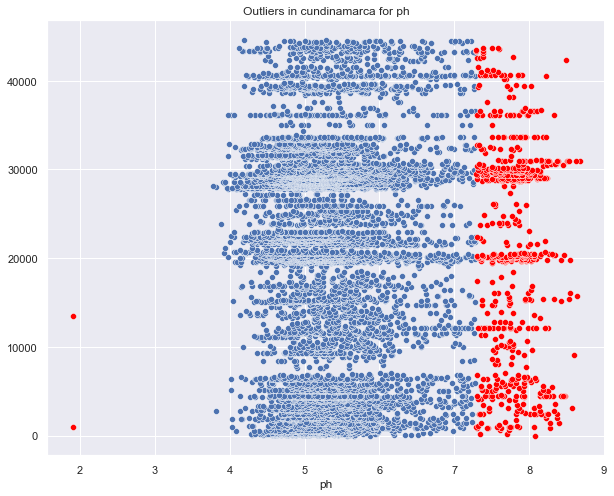

In [16]:
detect_outliers_dep('ph', 'cundinamarca')

### Univariate Outliers Detection per Municipality

In [19]:
def detect_outliers_mun(variable, municipio):
    # funcion para detectar outliers para cada variable
    df_work = df[df['municipio']==municipio].copy().dropna(subset=[variable])
    tamaño=df_work.shape
    Q3 = df_work[variable].quantile(0.75)
    Q1 = df_work[variable].quantile(0.25)
    IQR = Q3 - Q1
    superior = Q3 + (1.5 * IQR)
    inferior = Q1 - (1.5 * IQR)
    out_sup = df_work[df_work[variable] > superior].index
    out_inf = df_work[df_work[variable] < inferior].index
    outliers = []
    for i in out_sup:
        outliers.append(i)
    for j in out_inf:
        outliers.append(j)
    size = len(outliers)
    print(f'De un total de {tamaño[0]} de muestras en la region de {municipio}, se detectaron {size} valores atípicos para la variable {variable}')
    ## Grafica
    df_outlier=df.iloc[outliers]
    
    sns.set(rc = {'figure.figsize':(10,8)})
    sns.scatterplot(df_work[variable], df_work.index)
    sns.scatterplot(df_outlier[variable], df_outlier.index, color="red")
    plt.title(f'Outliers in {municipio} for {variable}')

De un total de 820 de muestras en la region de cúcuta, se detectaron 11 valores atípicos para la variable materia_organica


C:\Users\Cristina Gomez\anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Cristina Gomez\anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


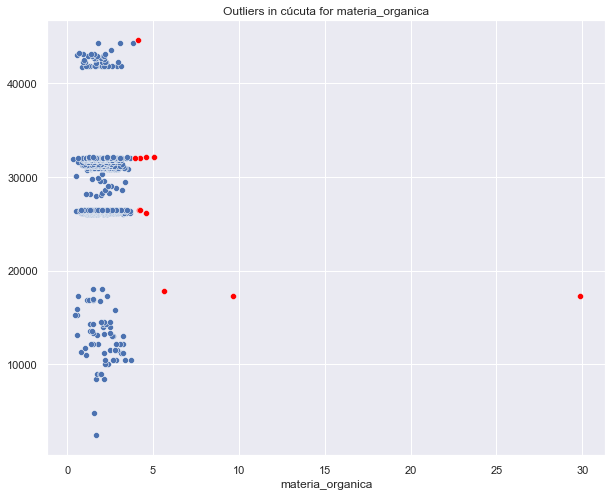

In [20]:
detect_outliers_mun('materia_organica', 'cúcuta')

## Multivariate Outliers Detection


In [4]:
df_to_norm=df[['ph','materia_organica', 'fosforo', 'azufre', 'acidez', 'aluminio', 'calcio','magnesio', 
                'potasio', 'sodio', 'cice', 'ce', 'hierro_olsen', 'cobre','manganeso', 'zinc_olsen', 'boro']]
X=df[['departamento','municipio','topografia_ligeramente_ondulado', 'topografia_moderadamente_ondulado',
       'topografia_no_indica', 'topografia_ondulado', 'topografia_pendiente','topografia_pendiente_fuerte', 'topografia_pendiente_leve', 
       'topografia_pendiente_moderada','topografia_plano', 'drenaje_bueno','drenaje_malo', 'drenaje_muy_buen_drenaje', 'drenaje_no_indica',
       'drenaje_regular', 'riego_aspersión', 'riego_cañón', 'riego_goteo','riego_gravedad', 'riego_manguera', 'riego_microaspersión','riego_no_cuenta_con_riego', 
       'riego_no_indica', 'riego_por_inundación']]

### Variables scaling

In [72]:
#Data is normalized with MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df_to_norm)
df_escalado = pd.DataFrame(df_escalado) 
df_escalado = df_escalado.rename(columns = {0: 'ph', 1: 'materia_organica', 2: 'fosforo' , 3: 'azufre', 
                                            4: 'acidez', 5: 'aluminio', 6: 'calcio', 7: 'magnesio',
                                           8: 'potasio', 9: 'sodio', 10: 'cice', 11: 'ce', 12: 'hierro_olsen',
                                           13:'cobre', 14: 'manganeso', 15: 'zinc_olsen',16: 'boro'})

In [73]:
frames=[df_escalado,X]
final_df=pd.concat(frames,axis=1)

Considering that there are a lot of NaN values for some variables, we are going to determine 4 test groups

### Test group 1

In [74]:
## 44496 samples
df_group1=final_df[['departamento','municipio','ph', 'materia_organica', 'fosforo', 'calcio', 'magnesio', 'potasio','sodio', 'cice','ce','boro','topografia_ligeramente_ondulado', 'topografia_moderadamente_ondulado',
       'topografia_no_indica', 'topografia_ondulado', 'topografia_pendiente','topografia_pendiente_fuerte', 'topografia_pendiente_leve', 
       'topografia_pendiente_moderada','topografia_plano', 'drenaje_bueno','drenaje_malo', 'drenaje_muy_buen_drenaje', 'drenaje_no_indica',
       'drenaje_regular', 'riego_aspersión', 'riego_cañón', 'riego_goteo','riego_gravedad', 'riego_manguera', 'riego_microaspersión','riego_no_cuenta_con_riego', 
       'riego_no_indica', 'riego_por_inundación']]
null_values=df_group1[df_group1.isnull().any(1)]
df_group1=df_group1.drop(null_values.index).reset_index(drop=True)


In [7]:
## 44496 samples
df_group5=final_df[['departamento','municipio','ph', 'materia_organica', 'fosforo', 'calcio', 'magnesio', 'potasio','sodio', 'cice','ce','boro']]
null_values=df_group5[df_group5.isnull().any(1)]
df_group5=df_group5.drop(null_values.index).reset_index(drop=True)

### Test group 2

In [81]:
# 43251 samples :adding 'ce','hierro_olsen','cobre','manganeso','zinc_olsen' to the set of variables
df_group2=final_df[['departamento','municipio','ph', 'materia_organica', 'fosforo', 'calcio', 'magnesio', 'potasio','sodio', 'cice','ce','hierro_olsen',
                    'cobre','manganeso','zinc_olsen', 'boro']]
null_values=df_group2[df_group2.isnull().any(1)]
df_group2=df_group2.drop(null_values.index).reset_index(drop=True)

### Test group 3

In [86]:
# 29850 samples: adding sulfur to the set of variables
df_group3=final_df[['departamento','municipio','ph', 'materia_organica', 'fosforo', 'calcio', 'magnesio', 'potasio','sodio', 'cice','ce','hierro_olsen','azufre',
                    'cobre','manganeso','zinc_olsen', 'boro']]
null_values=df_group3[df_group3.isnull().any(1)]
df_group3=df_group3.drop(null_values.index).reset_index(drop=True)

### Test group 4

In [85]:
# 14088 samples: incorporating aluminum and acidity to the set of variables
df_group4=final_df[['departamento','municipio','ph', 'materia_organica', 'fosforo', 'calcio', 'magnesio', 'potasio','sodio', 'cice','ce','hierro_olsen','azufre',
                    'cobre','manganeso','zinc_olsen', 'boro','acidez', 'aluminio']]
null_values=df_group4[df_group4.isnull().any(1)]
df_group4=df_group4.drop(null_values.index).reset_index(drop=True)

## KNN Model 

#### KNN Model to detect outliers per Department

In [116]:
def outliers_knn_dep(df,departamento): # depending on the test group
       
    df_region=df[df['departamento']==departamento]
    df_region=df_region.iloc[0::,2:]
    df_size=df_region.shape
    
    ### KNN MODEL 
    clf = KNN(contamination=0.005)
    modelo=clf.fit(df_region)
    y_pred = clf.predict(df_region)
    outliers_knn=df_region[y_pred == 1]
    outlier_size=outliers_knn.shape

    ### Outliers Plot
    knn_outliers_df = pd.DataFrame(y_pred, columns = ['Prediction'])
    X1=df_region[['ph', 'materia_organica', 'fosforo', 'calcio', 'magnesio', 'potasio','sodio', 'cice','ce','boro']]
    X1=X1.reset_index()
    data = pd.concat([X1, knn_outliers_df], axis = 1)
    
    print(f'De {df_size[0]} muestras de suelo tomadas en la region de {departamento}, {outlier_size[0]} fueron detectadas como outliers')
    sns.pairplot(data=data.iloc[0::,1:], hue="Prediction", palette="bright")
    

De 9007 muestras de suelo tomadas en la region de cundinamarca, 30 fueron detectadas como outliers


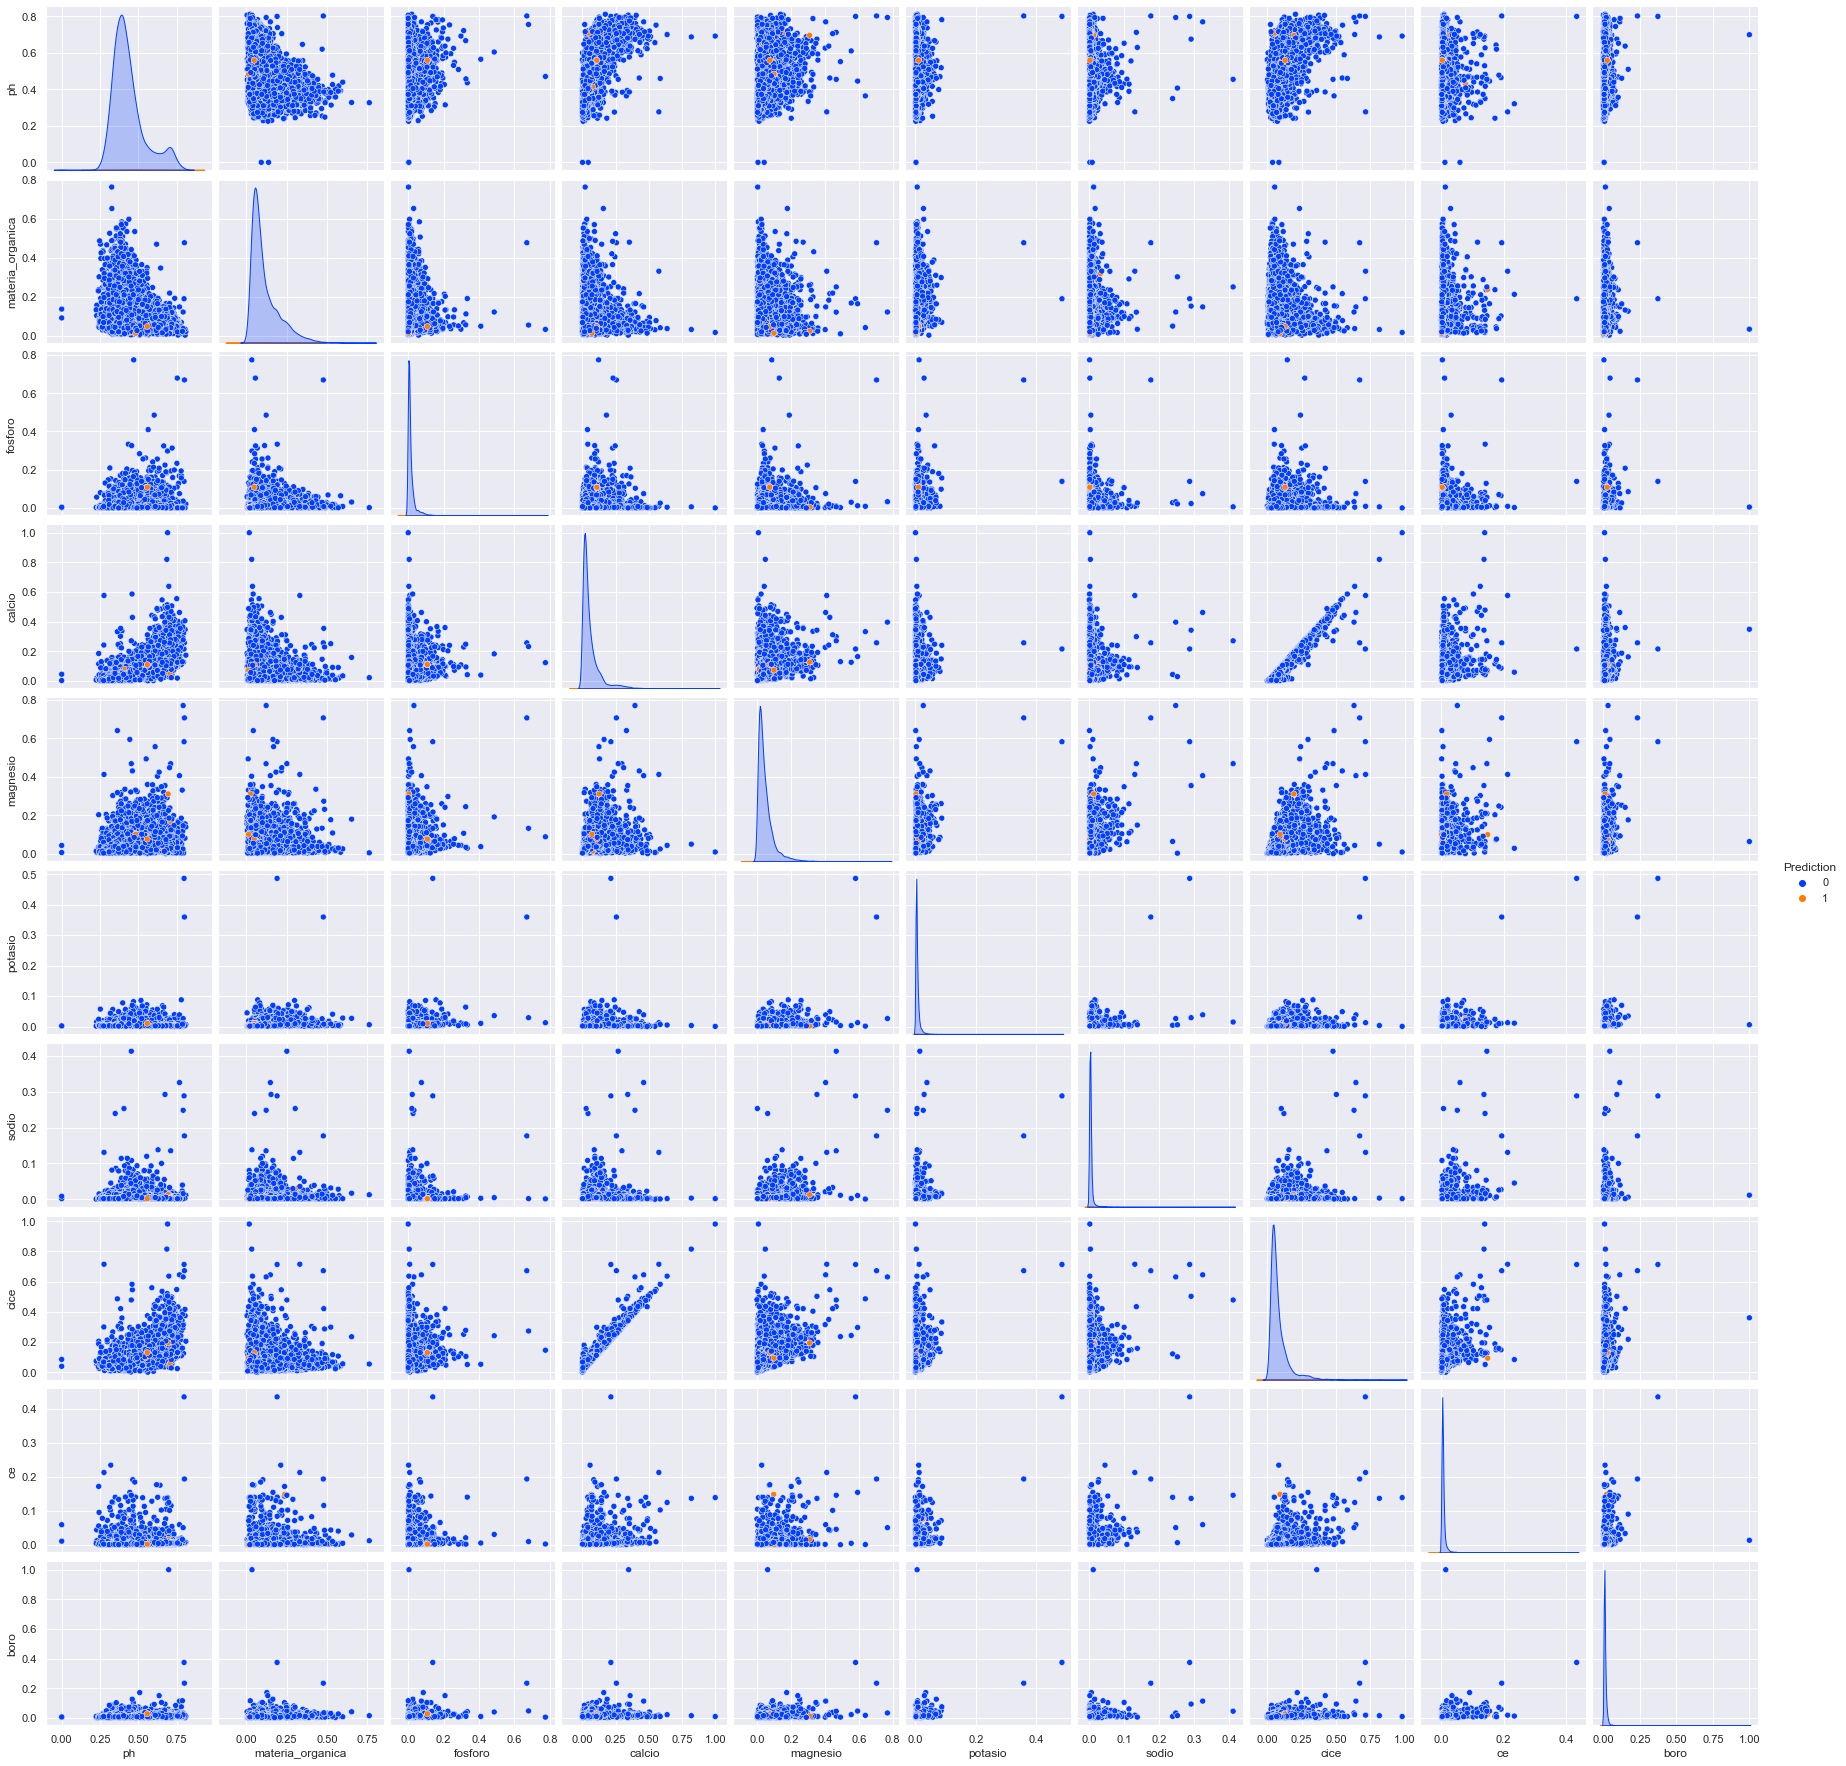

In [118]:
outliers_knn_dep(df_group1,'cundinamarca')

De 9007 muestras de suelo tomadas en la region de cundinamarca, 44 fueron detectadas como outliers


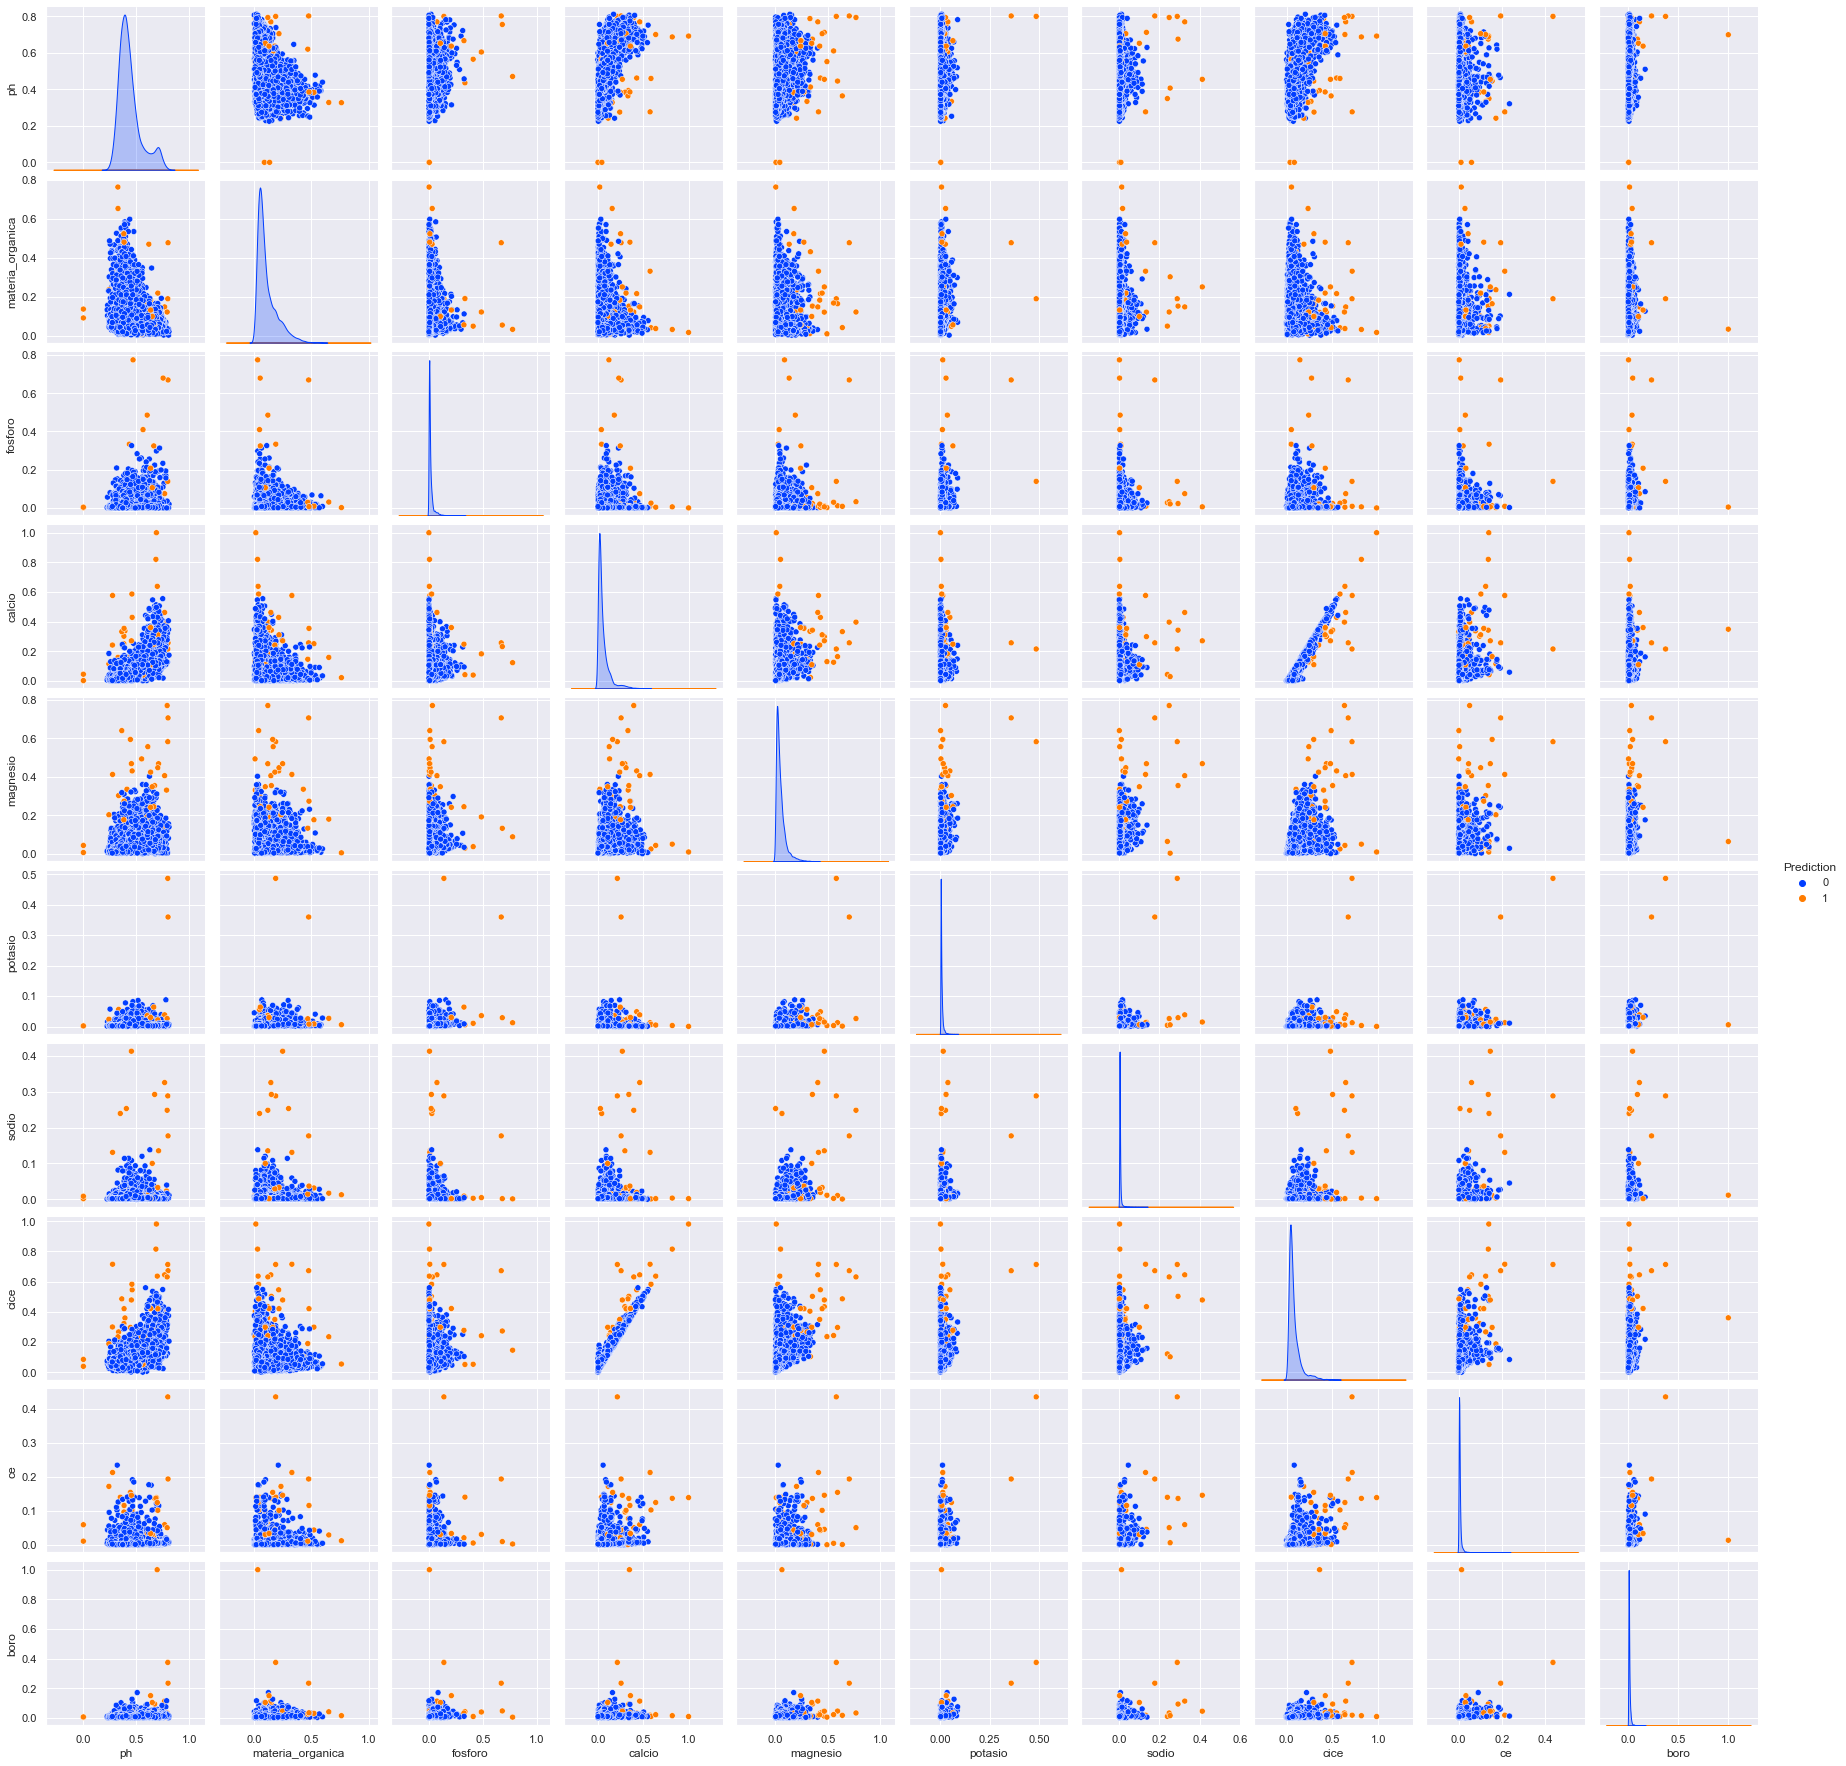

In [117]:
outliers_knn_dep(df_group5,'cundinamarca')

#### KNN Model to detect outliers per Municipality

In [121]:
def outliers_knn_mun(df,municipio): # depending on the test group
       
    df_region=df[df['municipio']==municipio]
    df_region=df_region.iloc[0::,2:]
    df_size=df_region.shape
    
    ### KNN MODEL 
    clf = KNN(contamination=0.1)
    modelo=clf.fit(df_region)
    y_pred = clf.predict(df_region)
    outliers_knn=df_region[y_pred == 1]
    outlier_size=outliers_knn.shape

    ### Outliers Plot
    knn_outliers_df = pd.DataFrame(y_pred, columns = ['Prediction'])
    X1=df_region[['ph', 'materia_organica', 'fosforo', 'calcio', 'magnesio', 'potasio','sodio', 'cice','ce','boro']]
    X1=X1.reset_index()
    data = pd.concat([X1, knn_outliers_df], axis = 1)
    
    print(f'De {df_size[0]} muestras de suelo tomadas en la region de {municipio}, {outlier_size[0]} fueron detectadas como outliers')
    sns.pairplot(data=data.iloc[0::,1:], hue="Prediction", palette="tab10")

De 817 muestras de suelo tomadas en la region de cúcuta, 60 fueron detectadas como outliers


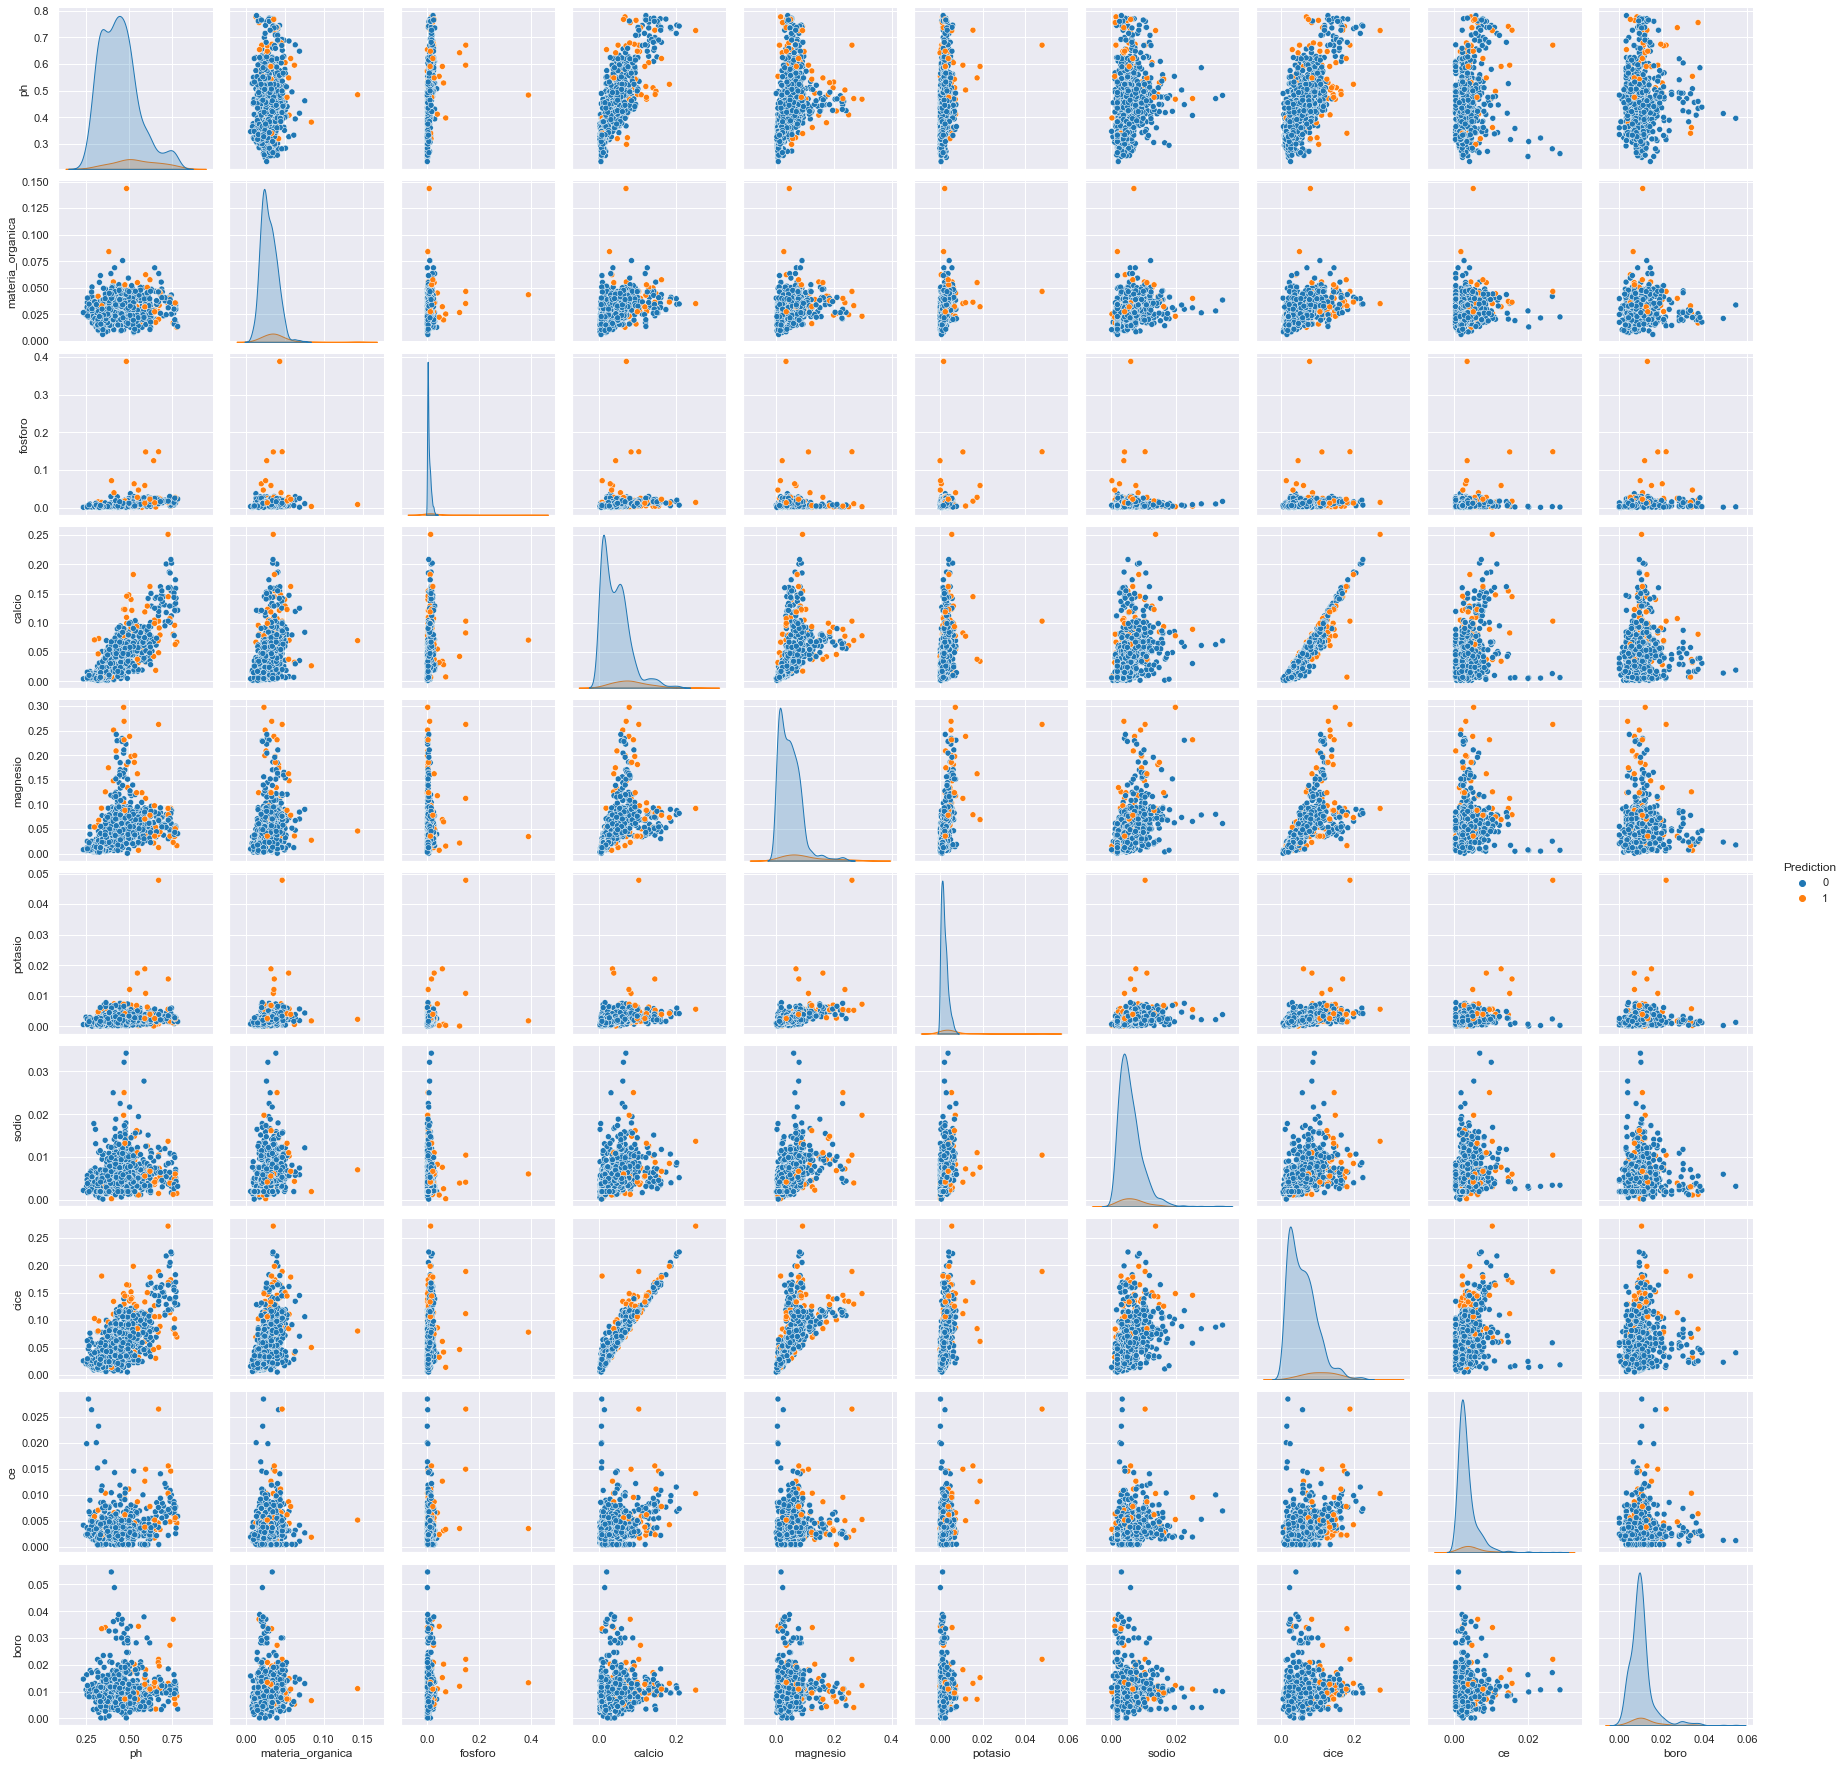

In [122]:
outliers_knn_mun(df_group5,'cúcuta')

### ISOLATION FOREST Model

#### Isolation Forest Model  to detect outliers per Department

In [104]:
def outliers_isof_dep(df,departamento):
        
    df_region=df[df['departamento']==departamento]
    df_region=df_region.iloc[0::,2:]
    df_size=df_region.shape
    
    ## ISOLATION FOREST MODEL
    iso_forest = IsolationForest(n_estimators=50, max_samples=100, contamination=0.01)
    modelo_iforest = iso_forest .fit(df_region)
    isof_outliers = iso_forest.predict(df_region)
    isof_outliers_df = pd.DataFrame(isof_outliers, columns = ['Prediction'])
        
    X1=df_region[['ph', 'materia_organica', 'fosforo', 'calcio', 'magnesio', 'potasio','sodio', 'cice','ce','boro']]
    X1=X1.reset_index()
    isoF_outliers_values = df_region[isof_outliers == -1]
    outlier_size=isoF_outliers_values.shape
    data = pd.concat([X1, isof_outliers_df], axis = 1)
    
    # Grafico
    print(f'De {df_size[0]} muestras de suelo tomadas en la region de {departamento}, {outlier_size[0]} fueron detectadas como outliers')
    sns.pairplot(data=data.iloc[0::,1:], hue="Prediction", palette="bright")

C:\Users\Cristina Gomez\anaconda3\envs\geo_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


De 9007 muestras de suelo tomadas en la region de cundinamarca, 91 fueron detectadas como outliers


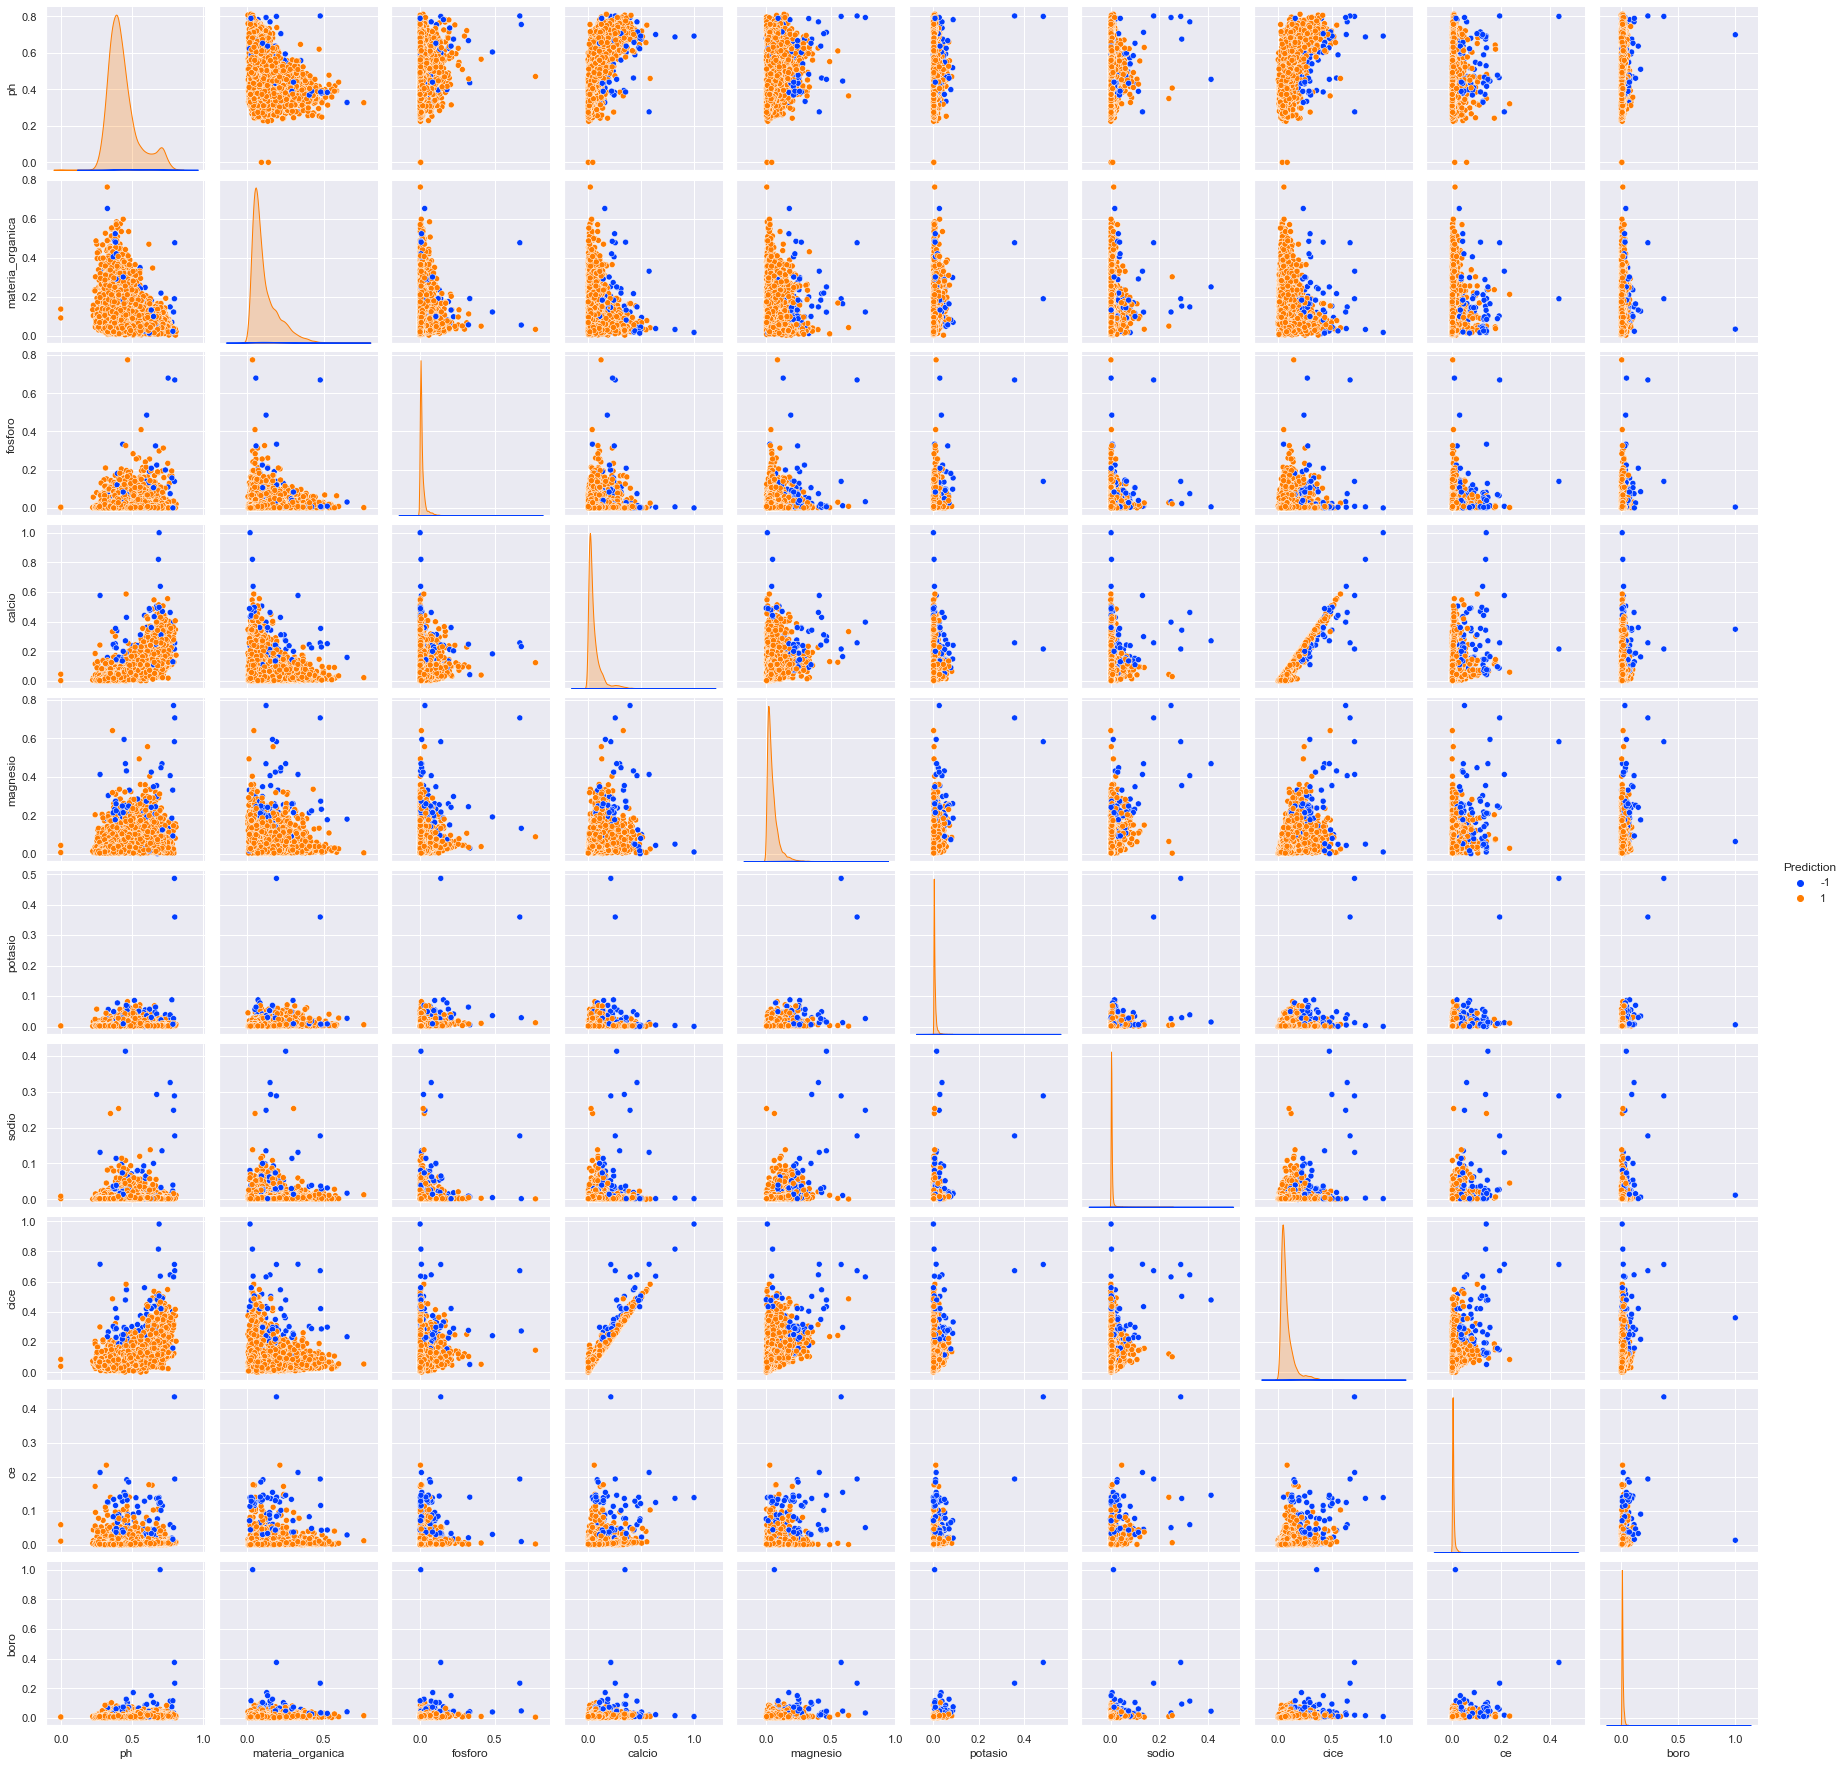

In [105]:
outliers_isof_dep(df_group5,'cundinamarca')

#### Isolation Forest Model  to detect outliers per Municipality

In [73]:
def outliers_isof_mun(df,municipio):
        
    df_region=df[df['municipio']==municipio]
    df_region=df_region.iloc[0::,2:]
    df_size=df_region.shape
    
    ## ISOLATION FOREST MODEL
    iso_forest = IsolationForest(n_estimators=50, contamination=0.1)
    modelo_iforest = iso_forest .fit(df_region)
    isof_outliers = iso_forest.predict(df_region)
    isof_outliers_df = pd.DataFrame(isof_outliers, columns = ['Prediction'])
        
    X1=df_region[['ph', 'materia_organica', 'fosforo', 'calcio', 'magnesio', 'potasio','sodio', 'cice','ce','boro']]
    X1=X1.reset_index()
    isoF_outliers_values = df_region[isof_outliers == -1]
    outlier_size=isoF_outliers_values.shape
    data = pd.concat([X1, isof_outliers_df], axis = 1)
    
    # Grafico
    print(f'De {df_size[0]} muestras de suelo tomadas en la region de {municipio}, {outlier_size[0]} fueron detectadas como outliers')
    sns.pairplot(data=data.iloc[0::,1:], hue="Prediction",palette="tab10")
    

C:\Users\Cristina Gomez\anaconda3\envs\geo_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


De 817 muestras de suelo tomadas en la region de cúcuta, 82 fueron detectadas como outliers


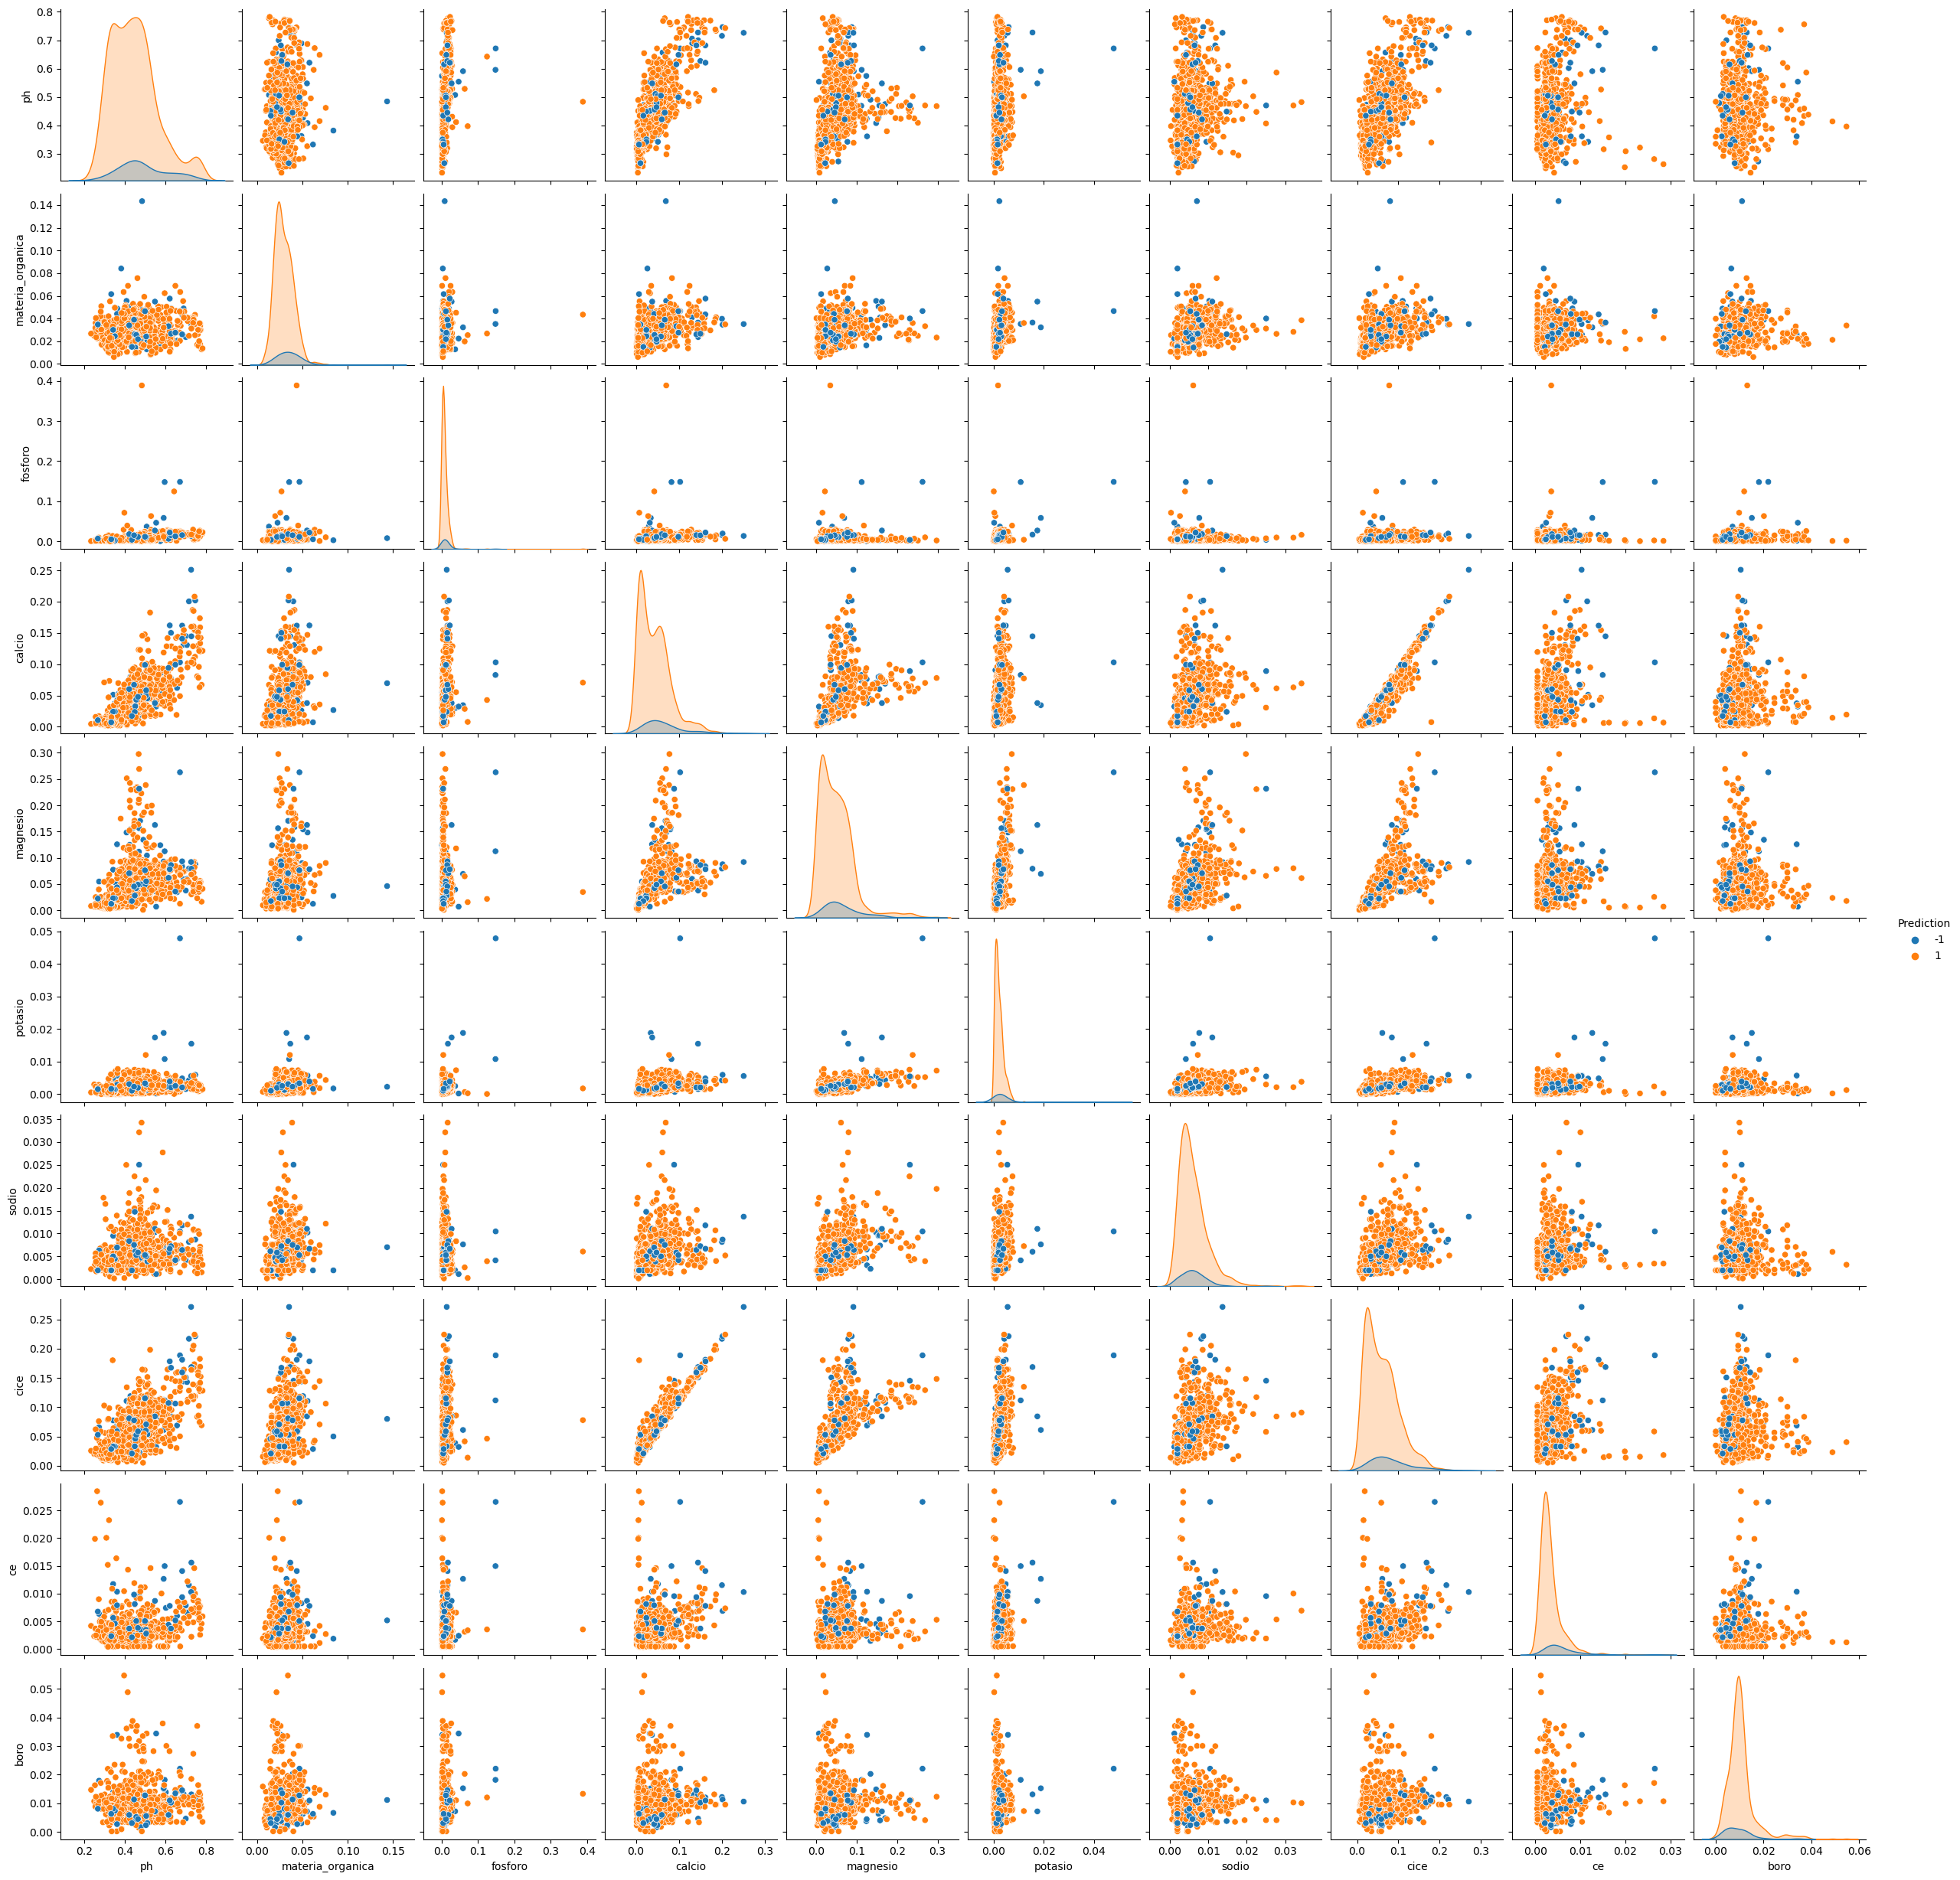

In [244]:
outliers_isof_mun(df_group1,'cúcuta')

In [102]:
def outliers_isof_mun2(df,municipio):
        
    df_region=df[df['municipio']==municipio]
    df_region=df_region.iloc[0::,2:]
    df_size=df_region.shape
    
    ## ISOLATION FOREST MODEL
    iso_forest = IsolationForest(n_estimators=50, contamination=0.1)
    modelo_iforest = iso_forest .fit(df_region)
    isof_outliers = iso_forest.predict(df_region)
    isof_outliers_df = pd.DataFrame(isof_outliers, columns = ['Prediction'])
        
    X1=df_region[['ph', 'materia_organica', 'fosforo', 'calcio', 'magnesio', 'potasio','sodio', 'cice','ce','boro']]
    X1=X1.reset_index()
    isoF_outliers_values = df_region[isof_outliers == -1]
    outlier_size=isoF_outliers_values.shape
    data = pd.concat([X1, isof_outliers_df], axis = 1)
        
    # Grafico
    print(f'De {df_size[0]} muestras de suelo tomadas en la region de {municipio}, {outlier_size[0]} fueron detectadas como outliers')
    sns.pairplot(data=data.iloc[0::,1:], hue="Prediction",palette="tab10")
    

C:\Users\Cristina Gomez\anaconda3\envs\geo_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


De 817 muestras de suelo tomadas en la region de cúcuta, 82 fueron detectadas como outliers


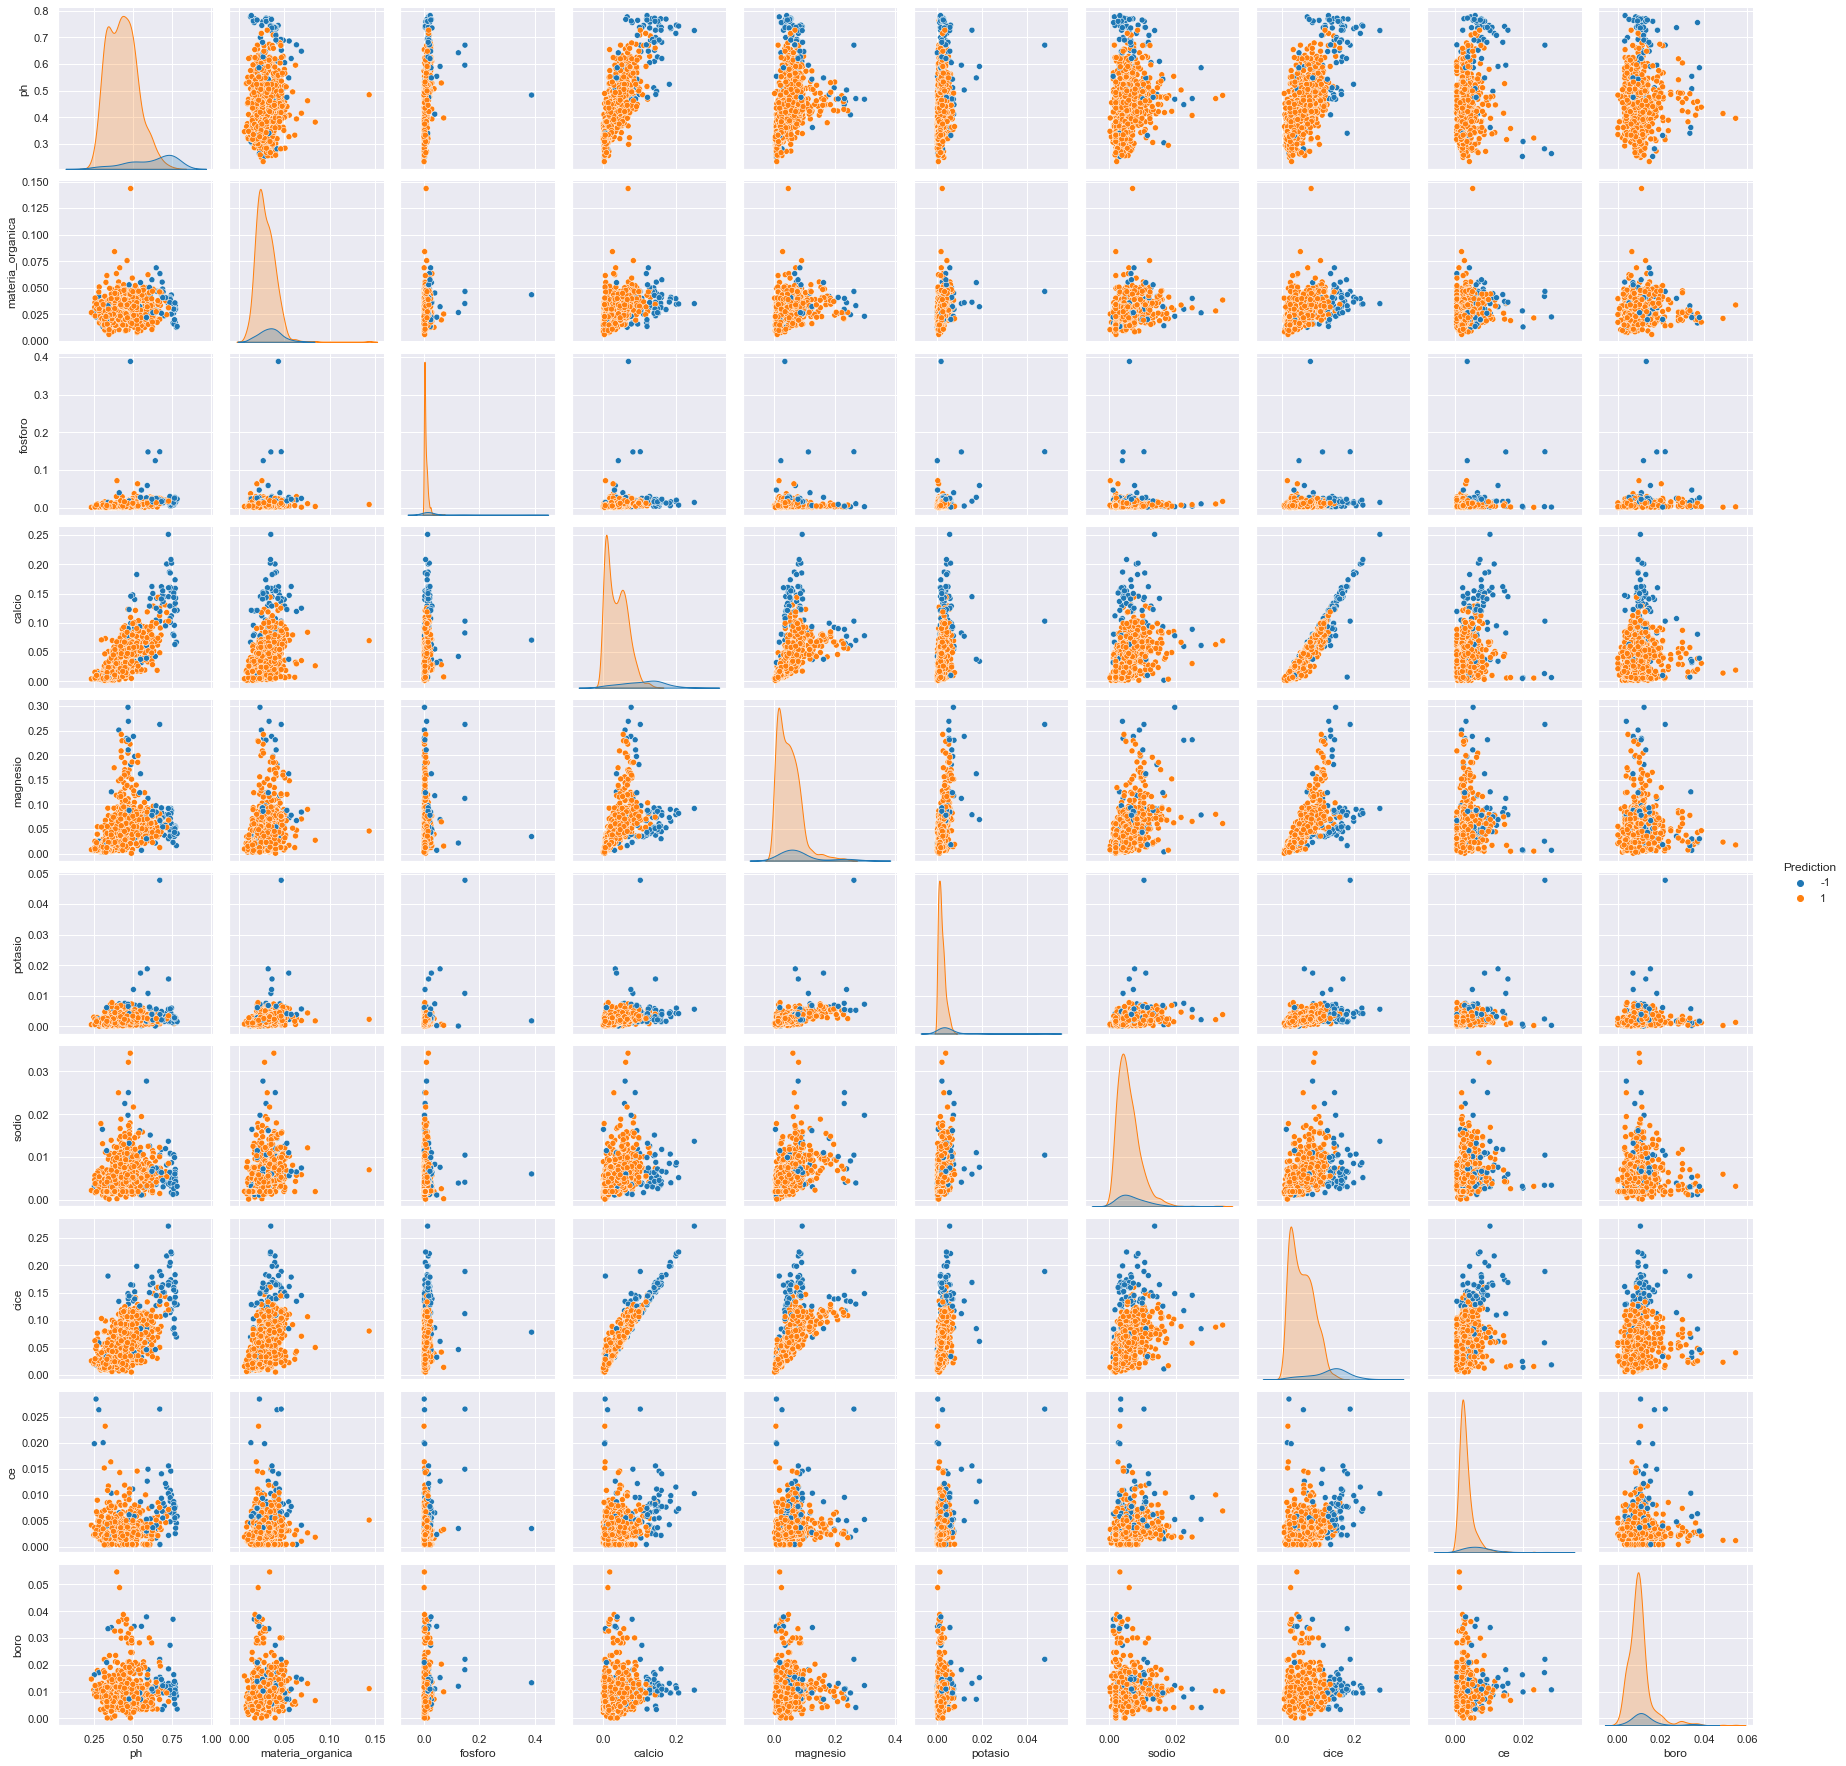

In [103]:
outliers_isof_mun2(df_group5,'cúcuta')

# KPCA implementation 

In [63]:
def outliers_isof_mun3(df,municipio):
        
    df_region=df[df['municipio']==municipio]
    df_region=df_region.iloc[0::,2:]
    df_size=df_region.shape
    
    kpca = KernelPCA(n_components=2, kernel='poly' )
    model=kpca.fit(df_region)
    dt_train = kpca.transform(df_region)

    ## ISOLATION FOREST MODEL
    iso_forest = IsolationForest(n_estimators=50, contamination=0.07)
    modelo_iforest = iso_forest .fit(dt_train)
    isof_outliers = iso_forest.predict(dt_train)
    isof_outliers_df = pd.DataFrame(isof_outliers, columns = ['Prediction'])
        
    isoF_outliers_values = dt_train[isof_outliers == -1]
    outlier_size=isoF_outliers_values.shape
    data = pd.concat([(pd.DataFrame(dt_train)), isof_outliers_df], axis = 1)
    data=data.rename(columns={0: 'Artifitial variable X',1: 'Artifitial variable Y' })
    data['Prediction'].replace({-1: 'Outlier', 1: 'No outlier'}, inplace=True)
    
        
    # Grafico
    print(f'De {df_size[0]} muestras de suelo tomadas en la region de {municipio}, {outlier_size[0]} fueron detectadas como outliers')
    sns.scatterplot(data=data,x='Artifitial variable X',y='Artifitial variable Y', hue="Prediction",palette="tab10")
    

De 546 muestras de suelo tomadas en la region de bogotá,  d.c., 39 fueron detectadas como outliers


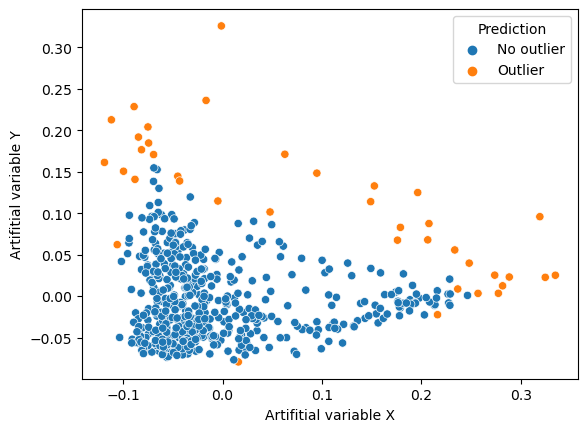

In [64]:
outliers_isof_mun3(df_group5,'bogotá,  d.c.')

De 546 muestras de suelo tomadas en la region de bogotá,  d.c., 39 fueron detectadas como outliers


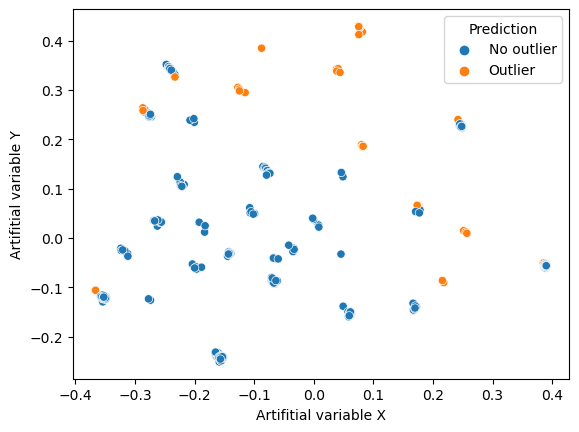

In [84]:
outliers_isof_mun3(df_group1,'bogotá,  d.c.') # con variables dummies

De 220 muestras de suelo tomadas en la region de bogotá,  d.c., 16 fueron detectadas como outliers


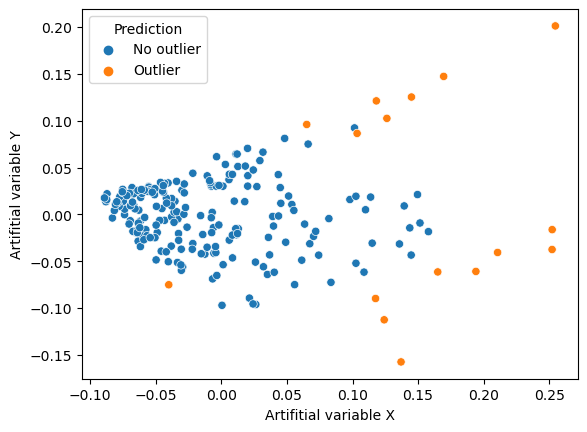

In [87]:
outliers_isof_mun3(df_group4,'bogotá,  d.c.')

In [69]:
def outliers_knn_mun3(df,municipio): # depending on the test group
       
    df_region=df[df['municipio']==municipio]
    df_region=df_region.iloc[0::,2:]
    df_size=df_region.shape
    
    #KPCA implementation
    kpca = KernelPCA(n_components=2, kernel='poly' )
    model=kpca.fit(df_region)
    dt_train = kpca.transform(df_region)
    
    ### KNN MODEL 
    clf = KNN(contamination=0.07)
    modelo=clf.fit(dt_train)
    y_pred = clf.predict(dt_train)
    outliers_knn=dt_train[y_pred == 1]
    outlier_size=outliers_knn.shape

    ### Outliers Plot
    knn_outliers_df = pd.DataFrame(y_pred, columns = ['Prediction'])
    data = pd.concat([(pd.DataFrame(dt_train)), knn_outliers_df], axis = 1)
    data=data.rename(columns={0: 'Artifitial variable X',1: 'Artifitial variable Y' })
    data['Prediction'].replace({1: 'Outlier', 0: 'No outlier'}, inplace=True)
    
        
    # Grafico
    print(f'De {df_size[0]} muestras de suelo tomadas en la region de {municipio}, {outlier_size[0]} fueron detectadas como outliers')
    sns.scatterplot(data=data,x='Artifitial variable X',y='Artifitial variable Y', hue="Prediction",palette="tab10")
    

De 546 muestras de suelo tomadas en la region de bogotá,  d.c., 25 fueron detectadas como outliers


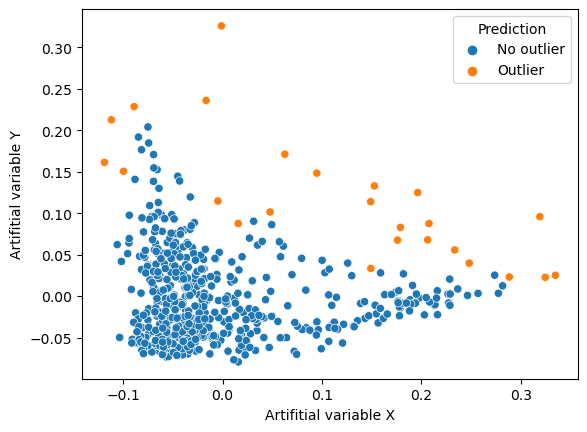

In [70]:
outliers_knn_mun3(df_group5,'bogotá,  d.c.')